In [1]:
#External libraries

import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import readgadget

In [2]:
# #Plotting settings

# import matplotlib.pyplot as plt
# from matplotlib import gridspec
# import matplotlib.patches as mpatches
# plt.rcParams["axes.linewidth"]  = 2.0
# plt.rcParams["xtick.major.size"]  = 10
# plt.rcParams["xtick.minor.size"]  = 5
# plt.rcParams["ytick.major.size"]  = 10
# plt.rcParams["ytick.minor.size"]  = 5
# plt.rcParams["xtick.direction"]  = "in"
# plt.rcParams["ytick.direction"]  = "in"
# plt.rcParams["legend.frameon"] = 'False'
# plt.rcParams['figure.figsize'] = [7, 7]
# plt.rcParams['font.family']="serif"
# plt.rc("text", usetex=True)
# plt.rc("font", size=20)

In [3]:
#The module that needs to be tested

#Necessary for relative imports (see https://stackoverflow.com/questions/34478398/import-local-function-from-a-module-housed-in-another-directory-with-relative-im)
module_path = os.path.abspath(os.path.join('../../'))           # '../../' is needed because the parent directory is two directories upstream of this test directory
if module_path not in sys.path:
    sys.path.append(module_path)

#from kNN_ASMR import HelperFunctions as hf
from kNN_3D import TracerAuto3D as TracerAuto3D
from kNN_3D import TracerTracerCross3D as TracerTracerCross3D
from kNN_3D import TracerTracerCross3D_DataVector as TracerTracerCross3D_DataVector

Refernce: 	arXiv:2007.13342 [astro-ph.CO]

Banerjee, Abel, "Nearest Neighbor distributions: new statistical measures for cosmological clustering", 2020, MNRAS

# Tracer Auto 3D

## Comparison with an analytic result: Poisson point process on a uniform field

In [4]:
boxsize=1000 #Mpc/h
nbar=(32**3)/(boxsize**3)
# Making Tracer Positions

r_min, r_max = 0.5, 30  # or maybe 0.5 to 15 for more dynamic range
no_bins = 20
#r_edges = np.logspace(np.log10(r_min), np.log10(r_max), no_bins + 1)
r_edges = np.linspace(r_min, r_max, no_bins + 1)

binrad = 0.5 * (r_edges[:-1] + r_edges[1:])

#Making query positions
print(binrad)

[ 1.2375  2.7125  4.1875  5.6625  7.1375  8.6125 10.0875 11.5625 13.0375
 14.5125 15.9875 17.4625 18.9375 20.4125 21.8875 23.3625 24.8375 26.3125
 27.7875 29.2625]


In [5]:
tracerpos = boxsize * np.random.rand(32**3, 3)
querypos = boxsize * np.random.rand(128**3, 3)


The analytic expression for 1-NN, 2NN of a Poisson sampling of a uniform field looks like:

$$CDF_{\text{1NN}}(V)=1-exp(-\bar{n}V)$$
$$CDF_{\text{2NN}}(V)=1-exp(-\bar{n}V)-(\bar{n}V)exp(-\bar{n}V)$$

Comparing this with the empirical calculation:

Checking inputs ...
	done.

building the tree ...
	done; time taken: 1.56e-02 s.

computing the tracer NN distances ...
	done; time taken: 1.51e+00 s.

computing the tracer auto-CDFs P_{>=k} ...
	done; time taken: 5.31e-01 s.

total time taken: 2.09e+00 s.


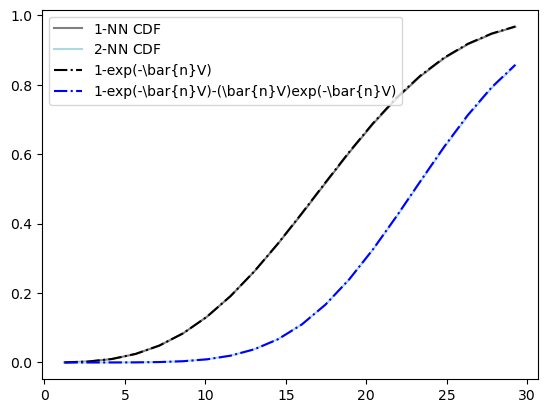

In [6]:
cdf=TracerAuto3D(boxsize=boxsize, kList=[1,2], BinsRad=[binrad, binrad], QueryPos=querypos, TracerPos=tracerpos, ReturnNNdist=True,Verbose=True)
analyticcdf1=1-np.exp(-nbar*(4/3)*np.pi*binrad**3)
analyticcdf2=1-np.exp(-nbar*(4/3)*np.pi*binrad**3)-(nbar*(4/3)*np.pi*binrad**3)*np.exp(-nbar*(4/3)*np.pi*binrad**3)
plt.plot(binrad, cdf[0][0], linestyle="-", color="grey", label=r"$1$-NN CDF")
plt.plot(binrad, cdf[0][1], linestyle="-", color="lightblue", label=r"$2$-NN CDF")
plt.plot(binrad, analyticcdf1, linestyle="-.", color="k", label=r"1-exp(-\bar{n}V)")
plt.plot(binrad, analyticcdf2, linestyle="-.", color="blue", label=r"1-exp(-\bar{n}V)-(\bar{n}V)exp(-\bar{n}V)")

plt.legend()

## For large-scale structure: Auto-correlation of $10^5$ most massive halos from the QUIJOTE Snaps

In [7]:
no_bins=13
r_min, r_max = 5, 35 #Mpc/h
r_edges = np.logspace(np.log10(r_min), np.log10(r_max),no_bins + 1)
binrad = 0.5 * (r_edges[:-1] + r_edges[1:])


Checking inputs ...
	done.

building the tree ...
	done; time taken: 4.58e-02 s.

computing the tracer NN distances ...
	done; time taken: 2.18e+01 s.

computing the tracer auto-CDFs P_{>=k} ...
	done; time taken: 6.21e+00 s.

total time taken: 2.83e+01 s.
Checking inputs ...
	done.

building the tree ...
	done; time taken: 4.46e-02 s.

computing the tracer NN distances ...
	done; time taken: 2.31e+01 s.

computing the tracer auto-CDFs P_{>=k} ...
	done; time taken: 7.39e+00 s.

total time taken: 3.08e+01 s.


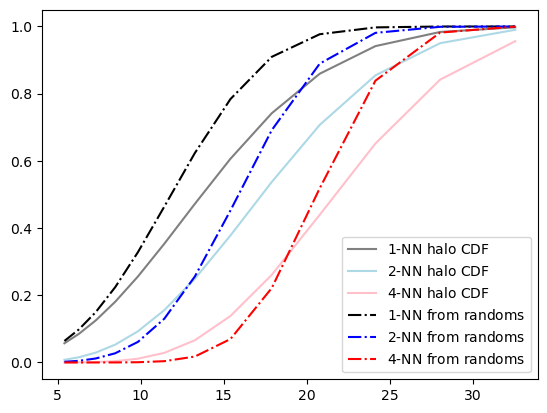

In [8]:
QueryPos=boxsize*np.random.rand(256**3,3)
RandomPos=boxsize*np.random.rand(10**5,3)
halos_fid = np.load(f'/media/anargha/6a5e2c73-73b9-4e46-ae8d-9c06f8f23a69/Arka_Data/Halos_FoF/Top10^5_mostmassivehalos/fiducial/0/halopos_0.npy')
halos_fid = np.mod(halos_fid, boxsize)
cdfs=TracerAuto3D(boxsize=boxsize, kList=[1,2,4], BinsRad=[binrad,binrad,binrad], QueryPos=QueryPos, TracerPos=halos_fid, Verbose=True)
cdfs_random=TracerAuto3D(boxsize=boxsize, kList=[1,2,4], BinsRad=[binrad,binrad,binrad], QueryPos=QueryPos, TracerPos=RandomPos, Verbose=True)

plt.plot(binrad, cdfs[0][0], linestyle="-", color="grey", label=r"$1$-NN halo CDF")
plt.plot(binrad, cdfs[0][1], linestyle="-", color="lightblue", label=r"$2$-NN halo CDF")
plt.plot(binrad, cdfs[0][2], linestyle="-", color="pink", label=r"$4$-NN halo CDF")
plt.plot(binrad, cdfs_random[0][0], linestyle="-.", color="k", label=r"$1$-NN from randoms")
plt.plot(binrad, cdfs_random[0][1], linestyle="-.", color="blue", label=r"$2$-NN from randoms")
plt.plot(binrad, cdfs_random[0][2], linestyle="-.", color="red", label=r"$4$-NN from randoms")

plt.legend()

# Tracer-Tracer Cross-Correlations 3D 

We first calculate the kNN CDFs for uncorrelated fields, and then do the same for the correlated fields and compare. To compare uncorrelated fields, we randomly choose $10^5$ particles from different realizations of a snap. To compare correlated fields, we choose the top $2\times 10^5$ halos from the same realization, split the sample along the median, and cross-correlate.

Note that the sampling needs to be done without replacement

Note that halos are biased tracers of teh density field, and hence we can reiterate the same thing with simulation particles. But if we are consistent with our choice of tracers, this should not matter.

First, for tracers tracing different realizations of the density field

In [9]:
boxsize=1000
no_bins=20
r_min, r_max = 8, 30 #Mpc/h
r_edges = np.logspace(np.log10(r_min), np.log10(r_max),no_bins + 1)
binrad = 0.5 * (r_edges[:-1] + r_edges[1:])

RandomPos=boxsize*np.random.rand(10**5,3)
QueryPos=boxsize*np.random.rand(256**3,3)

In [10]:
snapshot1='/media/anargha/6a5e2c73-73b9-4e46-ae8d-9c06f8f23a69/fiducial/100/snapdir_004/snap_004'
snapshot2='/media/anargha/6a5e2c73-73b9-4e46-ae8d-9c06f8f23a69/fiducial/199/snapdir_004/snap_004'

ptype = [1] #DM is 1, neutrinos is [2]
pos1   = readgadget.read_block(snapshot1, "POS ", ptype)/1e3 #positions in Mpc/h
pos2   = readgadget.read_block(snapshot2, "POS ", ptype)/1e3 #positions in Mpc/h


In [11]:

#creating a random mask that only selects those positions prescribed by a random number generator
mask1=np.random.choice(pos1.shape[0], size=10**5, replace=False)
mask2=np.random.choice(pos2.shape[0], size=10**5, replace=False)

#Choosing random 10^5 points
pos1=pos1[mask1]
pos2=pos2[mask2]


In [12]:
autoA,autoB,joint=TracerTracerCross3D(boxsize=boxsize, kA_kB_list=[(1,1),(2,2),(4,4)], BinsRad=[binrad,binrad,binrad], QueryPos=QueryPos, TracerPos_A=pos1, TracerPos_B=pos2, Verbose=True)

Checking inputs ...
	done.

building the trees ...
	first set of tracers done; time taken: 4.33e-02 s.
	second set of tracers done; time taken: 4.23e-02 s.
	combined time: 8.58e-02 s.

computing the tracer NN distances ...
	done; time taken: 1.74e+02 s.

computing the tracer auto-CDFs P_{>=kA}, P_{>=kB} ...
	done; time taken: 1.25e+01 s.

computing the joint-CDFs P_{>=kA, >=kB} ...
	done; time taken: 7.09e+00 s.

total time taken: 1.94e+02 s.


We impose a further scale cut, such that $r_{min}=min(binrad[0],CDF_{0.025})$, and $r_{max}=min(binrad[-1],CDF_{0.975})$

Choosing $2\times 10^5$ particles the same underlying density field ...

In [13]:
snapshot='/media/anargha/6a5e2c73-73b9-4e46-ae8d-9c06f8f23a69/fiducial/100/snapdir_004/snap_004'

ptype = [1] #DM is 1, neutrinos is [2]
pos   = readgadget.read_block(snapshot, "POS ", ptype)/1e3 #positions in Mpc/h



In [14]:

#creating a random mask that only selects those positions prescribed by a random number generator
mask=np.random.choice(pos.shape[0], size=2*10**5, replace=False)

#Choosing random 10^5 points
pos=pos[mask]


Partitioning the sample...

In [15]:
pos_1=np.zeros((10**5,3))
pos_2=np.zeros((10**5,3))

for i in range(10**5):
    pos_1[i]=pos[2*i]
    pos_2[i]=pos[2*i+1]

print(pos_1.shape)
print(pos_2.shape)

(100000, 3)
(100000, 3)


In [16]:
autoA_1,autoB_1,joint_1=TracerTracerCross3D(boxsize=boxsize, kA_kB_list=[(1,1),(2,2),(4,4)], BinsRad=[binrad,binrad,binrad], QueryPos=QueryPos, TracerPos_A=pos_1, TracerPos_B=pos_2, Verbose=True)


Checking inputs ...
	done.

building the trees ...
	first set of tracers done; time taken: 4.50e-02 s.
	second set of tracers done; time taken: 4.77e-02 s.
	combined time: 9.29e-02 s.

computing the tracer NN distances ...
	done; time taken: 1.53e+02 s.

computing the tracer auto-CDFs P_{>=kA}, P_{>=kB} ...
	done; time taken: 1.63e+01 s.

computing the joint-CDFs P_{>=kA, >=kB} ...
	done; time taken: 7.15e+00 s.

total time taken: 1.77e+02 s.


Calculating the auto CDFs, we expect them to show no difference.

Comparing the joint CDFs ...

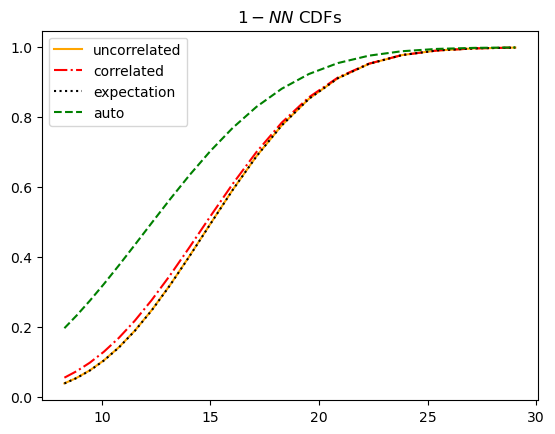

In [17]:
plt.plot(binrad, joint[0], linestyle="-", color="orange", label="uncorrelated")

plt.plot(binrad, joint_1[0], linestyle="-.", color="red", label="correlated")

plt.plot(binrad, autoA[0]*autoB[0], linestyle=":", color="k", label="expectation")

plt.plot(binrad, autoA_1[0], linestyle="--", color="green", label="auto")

plt.title(r'$1-NN$ CDFs')

plt.legend()

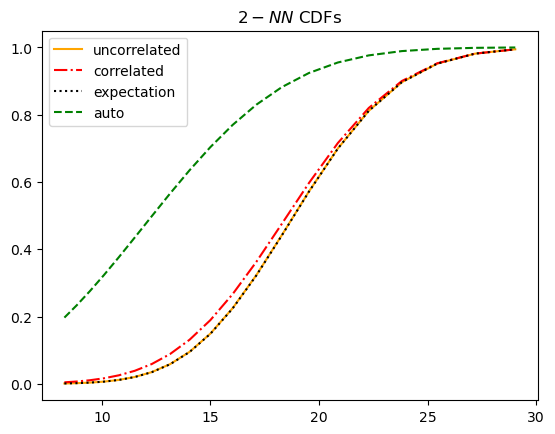

In [18]:
plt.plot(binrad, joint[1], linestyle="-", color="orange", label="uncorrelated")

plt.plot(binrad, joint_1[1], linestyle="-.", color="red", label="correlated")

plt.plot(binrad, autoA[1]*autoB[1], linestyle=":", color="k", label="expectation")

plt.plot(binrad, autoA_1[0], linestyle="--", color="green", label="auto")

plt.title(r'$2-NN$ CDFs')

plt.legend()

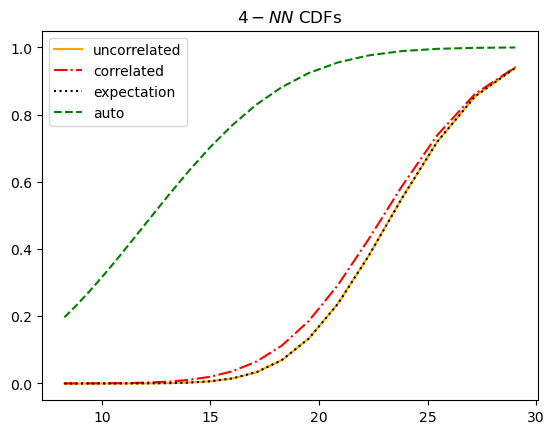

In [20]:
plt.plot(binrad, joint[2], linestyle="-", color="orange", label="uncorrelated")

plt.plot(binrad, joint_1[2], linestyle="-.", color="red", label="correlated")

plt.plot(binrad, autoA[2]*autoB[2], linestyle=":", color="k", label="expectation")

plt.plot(binrad, autoA_1[0], linestyle="--", color="green", label="auto")

plt.title(r'$4-NN$ CDFs')
plt.legend()

# Tracer-Tracer Cross3D Data Vector

In [ ]:
boxsize=1000
no_bins=20
r_min, r_max = 8, 30 #Mpc/h
r_edges = np.logspace(np.log10(r_min), np.log10(r_max),no_bins + 1)
binrad = 0.5 * (r_edges[:-1] + r_edges[1:])

RandomPos=boxsize*np.random.rand(10**4,3)
QueryPos=boxsize*np.random.rand(256**3,3)

Constructing TracerPos_A_dict ...

In [23]:
snapshot='/media/anargha/6a5e2c73-73b9-4e46-ae8d-9c06f8f23a69/fiducial/105/snapdir_004/snap_004'

ptype = [1] #DM is 1, neutrinos is [2]
pos   = readgadget.read_block(snapshot, "POS ", ptype)/1e3 #positions in Mpc/h

#creating a random mask that only selects those positions prescribed by a random number generator
mask=np.random.choice(pos.shape[0], size=10**4, replace=False)

#Choosing random 10^5 points
pos=pos[mask]



In [24]:
# Loading
import pickle
with open('TracerPos_A_dict.pkl', 'rb') as f:
    TracerPos_A_dict = pickle.load(f)
realizations=TracerTracerCross3D_DataVector(boxsize=boxsize, kA_kB_list=[(1,1),(2,2),(4,4)], BinsRad=[binrad,binrad,binrad], QueryPos=QueryPos, TracerPos_A_dict=TracerPos_A_dict, TracerPos_B=pos, Verbose=True)


Checking inputs ...
	done.

building the trees ...
	second set of tracers done; time taken: 4.67e-03 s.

 Building the tree for the 0th relaization of Tracer A
	set of tracers being iterated over done; time taken: 4.28e-03 s.
	combined time: 9.25e-03 s.

computing the tracer NN distances ...
	done; time taken: 1.05e+02 s.

computing the tracer auto-CDFs P_{>=kA}, P_{>=kB} ...
	done; time taken: 1.57e+01 s.

computing the joint-CDFs P_{>=kA, >=kB} ...
	done; time taken: 7.33e+00 s.

total time taken: 1.28e+02 s.

 Building the tree for the 1th relaization of Tracer A
	set of tracers being iterated over done; time taken: 3.45e-03 s.
	combined time: 7.33e+00 s.

computing the tracer NN distances ...
	done; time taken: 1.07e+02 s.

computing the tracer auto-CDFs P_{>=kA}, P_{>=kB} ...
	done; time taken: 1.32e+01 s.

computing the joint-CDFs P_{>=kA, >=kB} ...
	done; time taken: 7.05e+00 s.

total time taken: 2.55e+02 s.

 Building the tree for the 2th relaization of Tracer A
	set of tracer

In [25]:
joint_1nn = np.array([realizations[i][2][0] for i in range(len(realizations))])   # shape (n_realizations, 20)
joint_2nn = np.array([realizations[i][2][1] for i in range(len(realizations))])   # shape (n_realizations, 20)
joint_4nn = np.array([realizations[i][2][2] for i in range(len(realizations))])   # shape (n_realizations, 20)

autoA_1nn = np.array([realizations[i][0][0] for i in range(len(realizations))])   # shape (n_realizations, 20)
autoA_2nn = np.array([realizations[i][0][1] for i in range(len(realizations))])   # shape (n_realizations, 20)
autoA_4nn = np.array([realizations[i][0][2] for i in range(len(realizations))])   # shape (n_realizations, 20)

autoB_1nn = np.array([realizations[i][1][0] for i in range(len(realizations))])   # shape (n_realizations, 20)
autoB_2nn = np.array([realizations[i][1][1] for i in range(len(realizations))])   # shape (n_realizations, 20)
autoB_4nn = np.array([realizations[i][1][2] for i in range(len(realizations))])   # shape (n_realizations, 20)

joint_1nn_avg=np.mean(joint_1nn, axis=0)
joint_2nn_avg=np.mean(joint_2nn, axis=0)
joint_4nn_avg=np.mean(joint_4nn, axis=0)

autoA_1nn_avg=np.mean(autoA_1nn, axis=0)
autoA_2nn_avg=np.mean(autoA_2nn, axis=0)
autoA_4nn_avg=np.mean(autoA_4nn, axis=0)

autoB_1nn_avg=np.mean(autoB_1nn, axis=0)
autoB_2nn_avg=np.mean(autoB_2nn, axis=0)
autoB_4nn_avg=np.mean(autoB_4nn, axis=0)


In [ ]:
print(joint_1nnavg[0])
print(binrad)

[0.00054068 0.0007984  0.00118724 0.00174944 0.00257988 0.00378526
 0.00554269 0.00809982 0.0117679  0.01696859 0.02435719 0.03482674
 0.04942207 0.06939548 0.09643282 0.13237469 0.17899542 0.23788843
 0.31016392 0.39535079]
[ 8.27328201  8.8385168   9.44236872 10.0874761  10.77665754 11.5129242
 12.29949297 13.13980052 14.0375183  14.99656861 16.02114173 17.11571419
 18.28506839 19.53431346 20.86890758 22.29468185 23.81786573 25.44511429
 27.1835373  29.04073025]


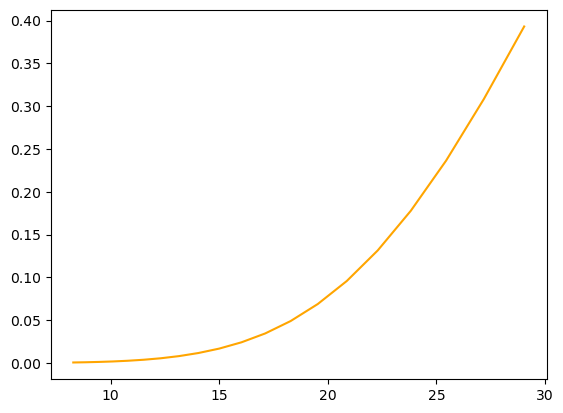

In [33]:
plt.plot(binrad, joint_1nn_avg, linestyle="-", color="orange", label=r"$correlated-joint$")
#plt.plot(binrad, autoA_1nn_avg[i]*autoB_1nn_avg[i], linestyle=":", color="green", label=r"$uncorrelated-joint$")